# <Strong>KNN CLASSIFICATION ( AGE INTERVAL- [Younger, Middle Age , Older] - LE , NOR)


### Details of dataset:

* Sex  - male, female
* Age - round up to 5 year
* Height - round up to 5 cm[cm]
* Weight [kg]
* Waistline
* Sight_left - eyesight(left)  the column shows how well the left eye sees, where perfect vision = 1.0
* Sight_right - eyesight(right)	the column shows how well the right eye sees where perfect vision = 1.0
* Hear_left	- hearing left, 1(normal), 2(abnormal)
* Hear_right - 	hearing right, 1(normal), 2(abnormal)
* SBP -	Systolic blood pressure[mmHg]
* DBP -	Diastolic blood pressure[mmHg]
* BLDS -	BLDS or FSG(fasting blood glucose)[mg/dL]
* Tot_chole -	total cholesterol[mg/dL]
* HDL_chole -	HDL cholesterol[mg/dL]	- the only fraction of cholesterol that is called "good", "useful" cholesterol.
* LDL_chole -	LDL cholesterol[mg/dL]
* Triglyceride -	triglyceride[mg/dL]
* Hemoglobin -	hemoglobin[g/dL]
* Urine_protein	- protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
* Serum_creatinine -	serum(blood) creatinine[mg/dL]
* SGOT_AST -	SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]
* SGOT_ALT -	ALT(Alanine transaminase)[IU/L]
* Gamma_GTP -	y-glutamyl transpeptidase[IU/L]
* SMK_stat_type_cd  -	Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
* DRK_YN -	Drinker or Not

## <Strong> 1. Importing necessary Libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix, precision_score,recall_score, f1_score
from sklearn import tree

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CSV /Smoking and Drinking/smoking_driking_dataset.csv')

In [ ]:
df.head(3)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N


## <Strong> 2. Data Preprocessing and Data Transformation

### <Strong> Description

In [ ]:
df.shape

(991346, 24)

In [ ]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
df.columns


Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [ ]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [ ]:
df.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

In [ ]:
age_values =  df['age'].value_counts()
print(age_values)

40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: age, dtype: int64


### <strong> Removing Duplicates from dataset

In [ ]:
df[df.duplicated()].shape


(26, 24)

In [ ]:
# removing duplicates instances to improve the data quality
df = df.drop_duplicates()

In [ ]:
df[df.duplicated()].shape

(0, 24)

### <strong> Convert Age into 3 Categories ( Young , Middle-aged , Senior )

In [ ]:
# append column based on age interval
age_bins = [0, 40, 60, float("inf")]  # Bins: 0-40, 40-60, 61 and above [float(inf) = positive infinity]
age_labels = ['Young', 'Middle-aged', 'Senior']

df['age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels , right= False)


In [ ]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,Young,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,Young,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,Middle-aged,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,Middle-aged,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,Middle-aged,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


### <strong> Label Encoding

In [ ]:
df['sex'] = LabelEncoder().fit_transform(df["sex"])
df['sex'].unique()


array([1, 0])

In [ ]:
df['DRK_YN'] = LabelEncoder().fit_transform(df["DRK_YN"])
df['DRK_YN'].unique()

array([1, 0])

In [ ]:
age_category = {"Young":0,"Middle-aged":1, "Senior" : 2 }
df = df.replace({"age": age_category})

In [ ]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,0,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,0,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,1,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,1,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,1,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [ ]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

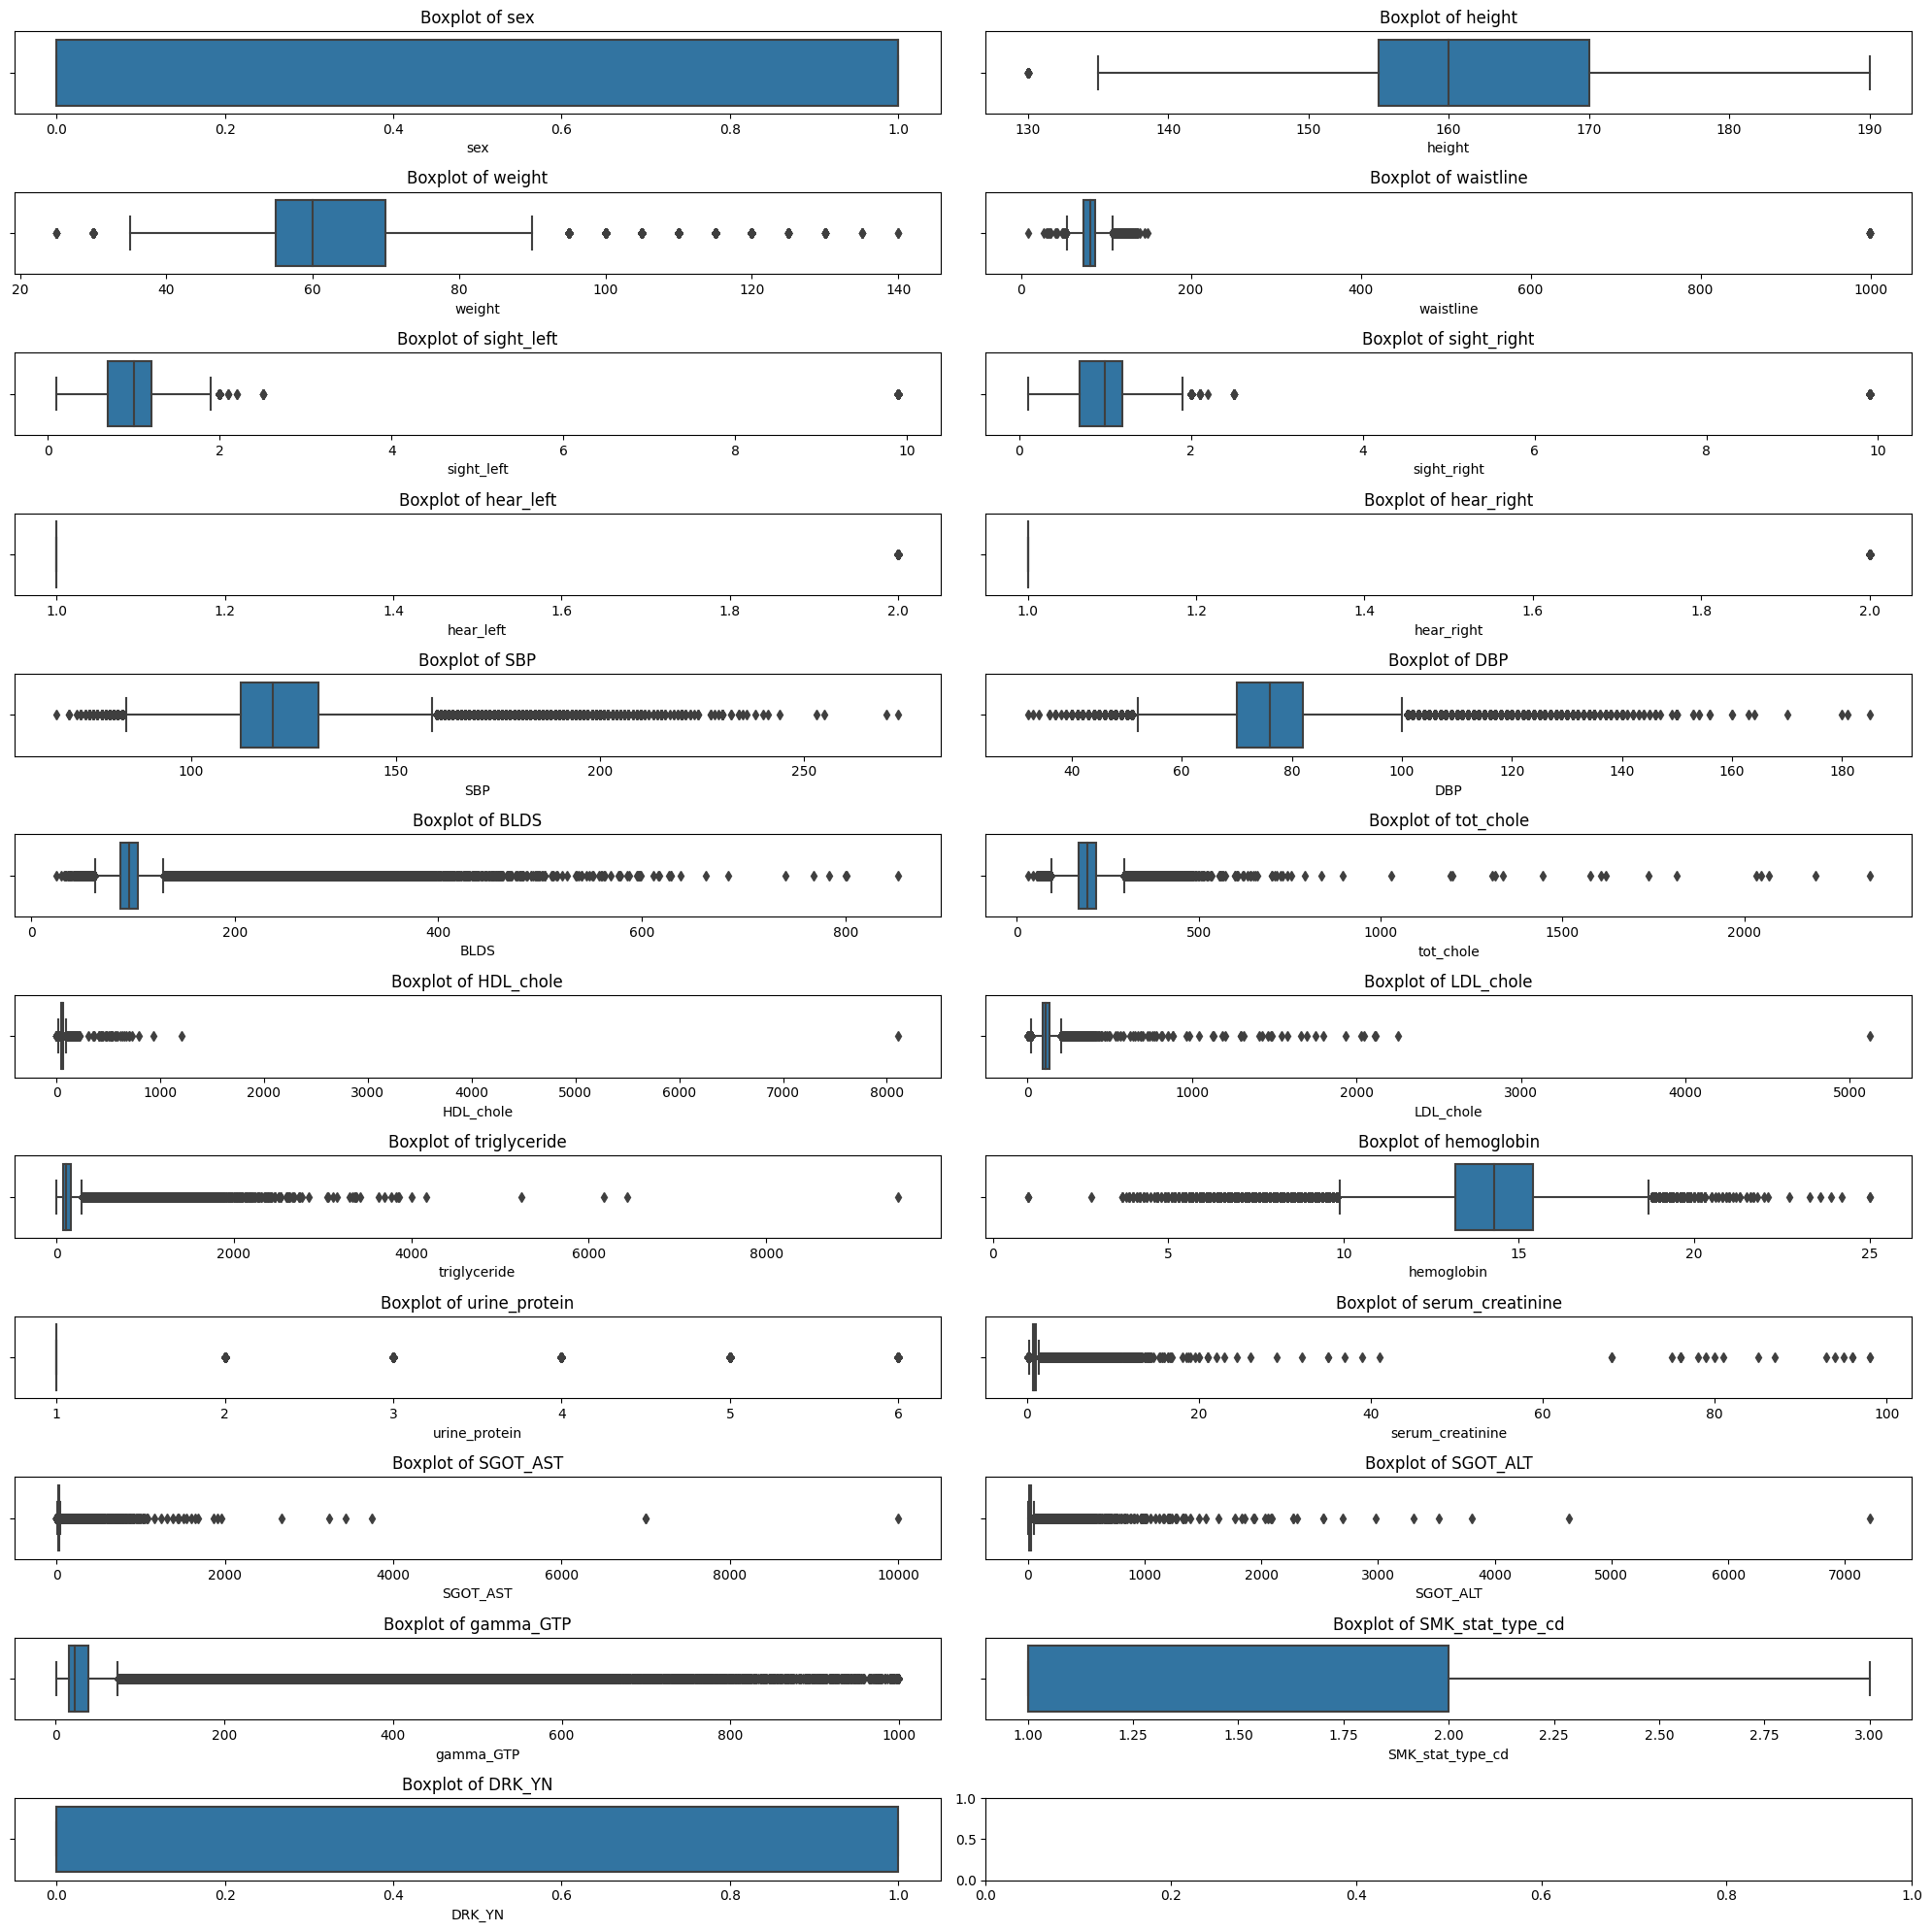

In [ ]:
plot_boxplots(df)

In [ ]:
df[df.duplicated()].shape

(0, 24)

In [ ]:
df.head(3)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,0,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,0,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,1,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0


## <Strong> 3. KNN Model Training

In [ ]:
a = [0, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
X = df.iloc[: , a].values
y =  df.iloc[: , 1].values

In [ ]:
y.shape


(991320,)

In [ ]:
X.shape

(991320, 23)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train , Y_test =  train_test_split(X,y, test_size=0.2, random_state=0)

sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

X_train

array([[-1.06379191, -1.85693454, -1.06177321, ..., -0.41845719,
        -0.74288548, -0.99873733],
       [-1.06379191, -1.31850664,  0.53694412, ...,  0.23473919,
        -0.74288548, -0.99873733],
       [-1.06379191,  0.29677707,  2.13566144, ..., -0.41845719,
        -0.74288548, -0.99873733],
       ...,
       [ 0.94003347,  0.29677707,  0.53694412, ..., -0.08196208,
         1.70085754,  1.00126427],
       [-1.06379191, -0.24165083, -0.66209388, ..., -0.24031272,
        -0.74288548, -0.99873733],
       [-1.06379191,  0.29677707, -0.66209388, ..., -0.47783867,
        -0.74288548,  1.00126427]])

In [ ]:
X_test

array([[-1.06379191,  0.83520497, -1.06177321, ..., -0.37886953,
        -0.74288548,  1.00126427],
       [ 0.94003347,  0.83520497,  0.53694412, ..., -0.18093123,
         0.47898603, -0.99873733],
       [ 0.94003347,  0.83520497,  0.93662345, ..., -0.3590757 ,
         0.47898603, -0.99873733],
       ...,
       [ 0.94003347,  1.91206078,  0.93662345, ..., -0.45804484,
        -0.74288548,  1.00126427],
       [ 0.94003347,  0.83520497,  0.93662345, ..., -0.31948804,
         0.47898603,  1.00126427],
       [ 0.94003347,  1.37363287,  0.93662345, ..., -0.04237442,
         1.70085754,  1.00126427]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
#accuracy_score
accuracy_score(Y_test,y_pred)

0.6131975547754509

In [ ]:
# precison
precision = precision_score(Y_test,y_pred, average="weighted")
precision

0.6166000625386358

In [ ]:
# recall
recall = recall_score(Y_test,y_pred, average="weighted")
recall

0.6131975547754509

In [ ]:
# F1 score
f1 =  f1_score(Y_test,y_pred, average="weighted")
f1

0.6126496876568671

In [ ]:
# Classification Report
report = classification_report(Y_test, y_pred , output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.546763,0.542650,0.544699,49848.000000
1,0.613944,0.673213,0.642214,98064.000000
2,0.690911,0.566154,0.622342,50352.000000
accuracy,0.613198,0.613198,0.613198,0.613198
macro avg,0.617206,0.594006,0.603085,198264.000000
weighted avg,0.616600,0.613198,0.612650,198264.000000


## <strong> 4. HyperParameter Tuning

In [ ]:
param_grid = {
    'n_neighbors': [3,7, 9],  # Varying the number of neighbors
    'weights': ['uniform', 'distance'],  # Different weight options
    'p': [1, 2]  # Minkowski distance parameter for power parameter
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,Y_train)

In [ ]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)